# **Visual Analytics - Assignment 1**
## Building a Simple Image Search Algorithm
#### Cultural Data Science

**Author:** Rikke Uldbæk (202007501) <br>
**Date:** 23/2 2023



Run the following command in the terminal to load packages: <br>
```bash setup.sh```

In [1]:
# Loading packages
import os  
import sys
sys.path.append(os.path.join(".."))
import cv2
import pandas as pd
from utils.imutils import jimshow
from utils.imutils import jimshow_channel
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

2023-05-02 11:25:08.006788: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-02 11:25:08.054155: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-02 11:25:08.055376: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-02 11:25:08.867917: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


### Image Search Algorithm

In [2]:
# Function

def compare_top5_hist(filename):
    # set data path
    path = os.path.join("..", "data", "flowers", filename)

    # Loading the file you want to compare to the rest
    image = cv2.imread(path)

    # Calculate histogram for that file
    image_hist = cv2.calcHist([image], [0,1,2], None, [256,256,256], [0,256, 0,256, 0,256])

    # Normalize the histogram from 0 - 1.0 for that file
    image_hist_norm = cv2.normalize(image_hist, image_hist, 0, 1.0, cv2.NORM_MINMAX) #normalizing from 0 - 1.0

    ######## Loop ########
    
    # Create an empty dataframe
    #df = pd.DataFrame(columns = ["image", "compare_score"])

    images_list = []
    compare_score_list = []

    # Create a new path
    new_path = os.path.join("..", "data", "flowers")

    # Looping over all images in flowers-folder
    for i in os.listdir(new_path):
        flower_images = cv2.imread(os.path.join(new_path, i)) # read the images

        # Make histograms
        all_hist = cv2.calcHist([flower_images], [0,1,2], None, [256,256,256], [0,256, 0,256, 0,256])

        # Normalize histograms
        all_hist_normalized = cv2.normalize(all_hist, all_hist, 0, 1.0, cv2.NORM_MINMAX)

        # Calculate compare scores for file and all other images in folder
        compare_scores =round(cv2.compareHist(image_hist_norm, all_hist_normalized, cv2.HISTCMP_CHISQR), 2)
         
        images_list.append(i)
        compare_score_list.append(compare_scores)
        # Append data to previously created dataframe
    
    
    df = pd.DataFrame({'image': images_list, "compare_score": compare_score_list})
    #df = df.append({"image": i,"compare_score":compare_scores}, ignore_index=True) 
    
    # Remove the row where the compare score = 0, i.e., identical image (filename compared to it self)
    df.drop(df[df['compare_score'] == 0].index, inplace = True) 

    # Make a top 5
    df=df.nsmallest(5, 'compare_score')

    # Write csv
    outpath = os.path.join("..", "out", "simple_search_out", "top5.csv")
    df.to_csv(outpath)
    
    # Save target image
    img_outpath = os.path.join("..", "out", "simple_search_out")
    cv2.imwrite(img_outpath+"/"+"target_image.jpg", image)
    
    # Save top 5 flowers
    for i in df["image"]:
        top_5_flowers_path = os.path.join("..", "data", "flowers",i)
        outpath = os.path.join("..", "out", "simple_search_out",i)
        top_images = cv2.imread(top_5_flowers_path)
        cv2.imwrite(outpath,top_images)

    # Sort ascending and return
    return(df.sort_values('compare_score'))


In [3]:
#run function
compare_top5_hist("image_0021.jpg") #target image 

,image,compare_score
1057,image_0949.jpg,81.96
304,image_0798.jpg,82.57
134,image_0022.jpg,82.65
512,image_0742.jpg,82.91
94,image_0910.jpg,83.16


### Comparing the top 5 qualitatively

In [12]:
df = compare_top5_hist("image_0021.jpg")

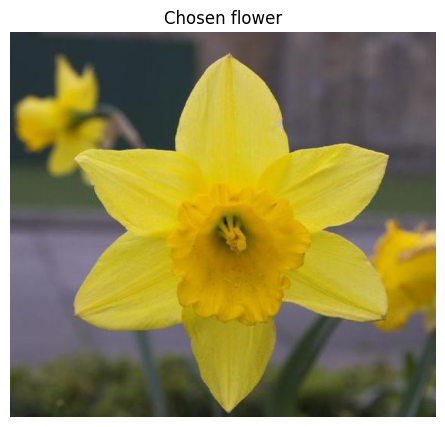

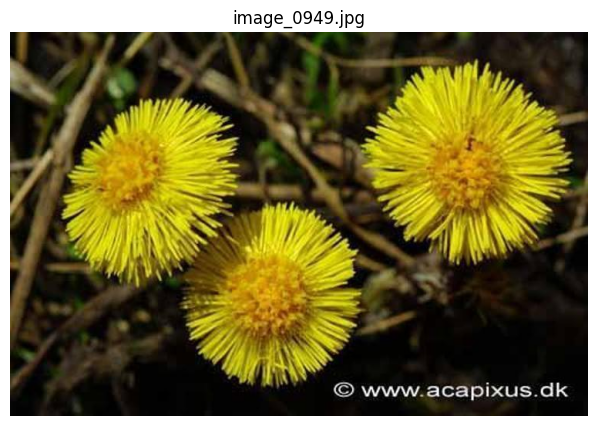

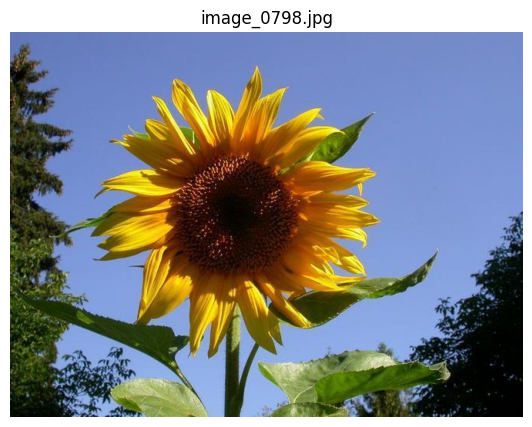

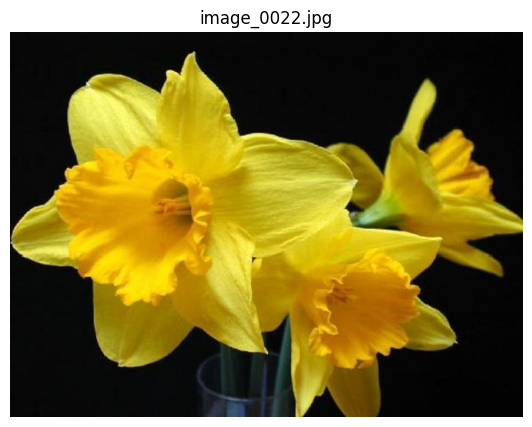

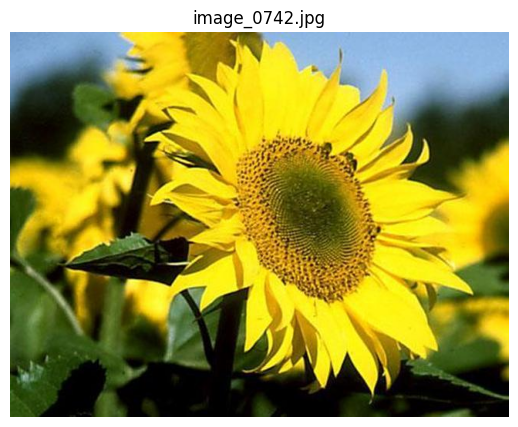

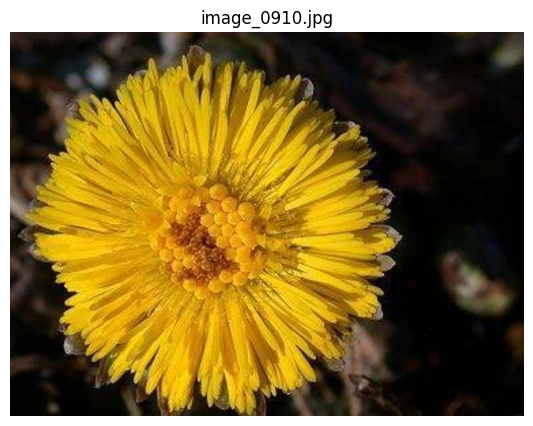

In [5]:
# My chosen image (image_0021.jpg)
real_img =cv2.imread(os.path.join("..", "data", "flowers", "image_0021.jpg"))
jimshow(real_img, "Chosen flower")

# Comparing with the top 5
for i in data["image"]:
    path = os.path.join("..", "data", "flowers", i)
    top5 = cv2.imread(path)
    jimshow(top5, f'{i}')

My chosen flower is a daffodil, and when my function finds the 5 most resembling flowers, only one of them is actually a daffodil. The function does not seem to be able to distinguish between flower species, hence the result. However, the five flowers found by my function do actually take up the circa same porportion of yellow pixels on the image, and this could be reason for why these exact five flowers is found to resemble my daffodil.